###**Q1**.  Use [Lucidchart](https://sjsu.edu/it/services/applications/lucidchart.php) to create an Entity Relationship Diagram (ERD) for the following tables representing a customer order tracking system:

Tables and fields:
1. product:
    - product_id: INTEGER (Primary key)
    - name: TEXT not null
    - price: REAL


2. customer:
    - customer_id: INTEGER (Primary key)
    - name: TEXT not null
    - email: TEXT not null


3. purchase_order:
    - order_id: INTEGER (Primary key)
    - customer_id: INTEGER (Foreign key)
    - date: TEXT not null ("YYYY-MM-DD")


4. order_item:
    - order_id: INTEGER (Foreign key)
    - product_id: INTEGER (Foreign key)
    - quantity: INTEGER
    


Export the ERD as PDF and submit it in Canvas.

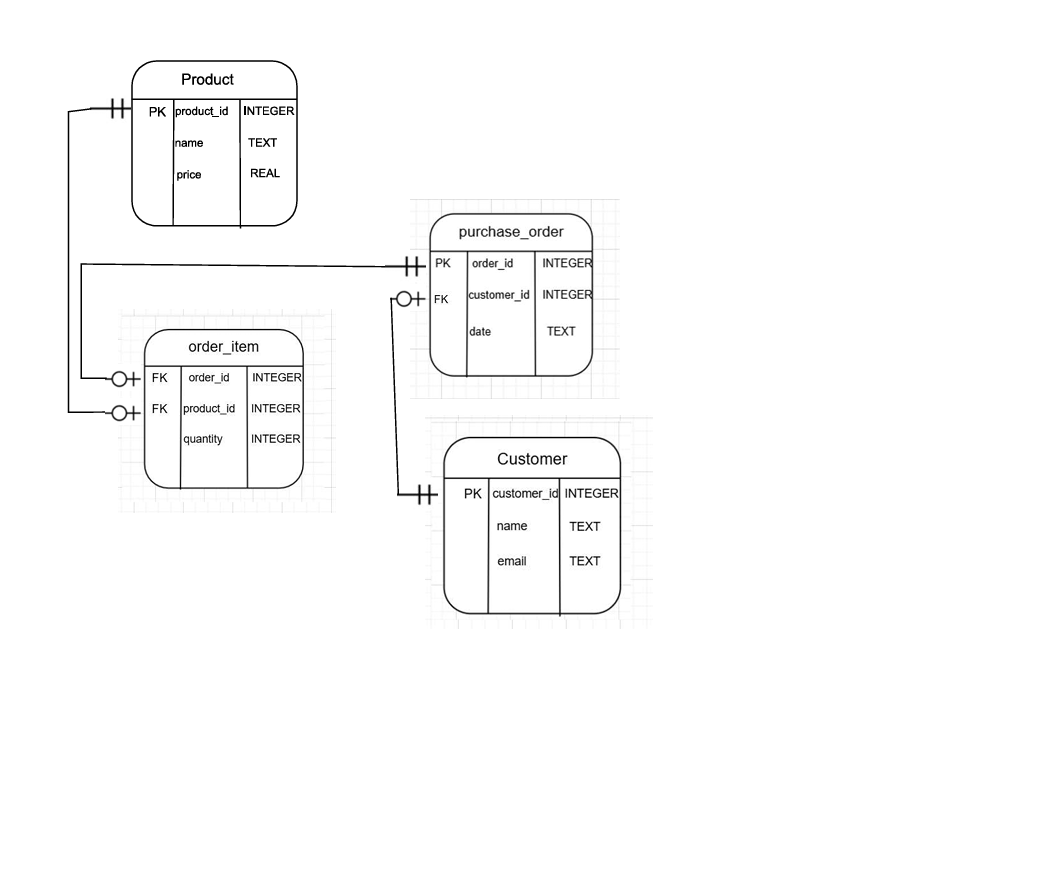

###**Q2**. Create SQLite tables and load data
1. Here are the csv files for the data for the four tables:
   - product: https://raw.githubusercontent.com/csbfx/cs133/main/product.csv
   - customer: https://raw.githubusercontent.com/csbfx/cs133/main/customer.csv
   - order_item: https://raw.githubusercontent.com/csbfx/cs133/main/order_item.csv
   - purchase_order: https://raw.githubusercontent.com/csbfx/cs133/main/purchase_order.csv
2. In this notebook, create the database and save it in a file called `store.db`, and create the four tables as described above.
3. Load the data in the csv files into the corresponding table.
4. Commit so that the data loaded to the tables to officially written to the tables.
5. Execute a query SELECT * from each table to make sure the data are properly loaded.
6. Execute a query using SELECT statement that queries with JOIN tables to find the purchase date, the products and quantities that a particular customer has purchased.

In [ ]:
# 2.2 Create the database and save it in a file called store.db, and create the four tables as described above.
# Your code here . . .
import sqlite3

connection = sqlite3.connect('store.db')
cursor = connection.cursor()

# Create Product Table
cursor.execute('''CREATE TABLE IF NOT EXISTS product (
             product_id INTEGER PRIMARY KEY,
             name TEXT NOT NULL,
             price REAL
             )''')

# Create Customer Table
cursor.execute('''CREATE TABLE IF NOT EXISTS customer (
              customer_id INTEGER PRIMARY KEY,
              name TEXT NOT NULL,
              email TEXT NOT NULL
              )''')
# Create Purchase Order Table

cursor.execute('''CREATE TABLE IF NOT EXISTS purchase_order (
              order_id INTEGER PRIMARY KEY,
              customer_id INTEGER,
              date TEXT,
              FOREIGN KEY (customer_id)
                REFERENCES customer (customer_id)
                ON DELETE CASCADE
                ON UPDATE NO ACTION
              )''')

# Create Order Item Table

cursor.execute('''CREATE TABLE IF NOT EXISTS order_item (
              order_id INTEGER,
              product_id INTEGER,
              quantity INTEGER,
              FOREIGN KEY (order_id)
                REFERENCES purchase_order (order_id)
                ON DELETE CASCADE
                ON UPDATE NO ACTION,
              FOREIGN KEY (product_id)
                REFERENCES product (product_id)
                ON DELETE CASCADE
                ON UPDATE NO ACTION
              )''')

In [ ]:
# 2.3 Load the data in the csv files into the corresponding table.
# Your code here . . .
import pandas as pd

product = pd.read_csv("https://raw.githubusercontent.com/csbfx/cs133/main/product.csv")
product.to_sql('product', connection, if_exists='append', index=False)

4

In [ ]:
customer = pd.read_csv("https://raw.githubusercontent.com/csbfx/cs133/main/customer.csv")
customer.to_sql('customer', connection, if_exists='append', index=False)

4

In [ ]:
purchase_order = pd.read_csv("https://raw.githubusercontent.com/csbfx/cs133/main/purchase_order.csv")
purchase_order.to_sql('purchase_order', connection, if_exists='append', index=False)

3

In [ ]:
order_item = pd.read_csv("https://raw.githubusercontent.com/csbfx/cs133/main/order_item.csv")
order_item.to_sql('order_item', connection, if_exists='append', index=False)

4

In [ ]:
# 2.4 Commit so that the data loaded to the tables to officially written to the tables.
# Your code here . . .
connection.commit()


In [ ]:
# 2.5 Execute a query SELECT * from each table to make sure the data are properly loaded.
# Your code here . . .
pd.read_sql_query("SELECT * FROM product", connection)

,product_id,name,price
0,0,bicycle,400.0
1,1,helmet,45.0
2,2,gloves,23.0
3,3,chain,48.0


In [ ]:
pd.read_sql_query("SELECT * FROM customer", connection)

,customer_id,name,email
0,0,Wendy Lee,wlee@bike.com
1,1,Jason Brown,jb@speed.com
2,2,Harry Potter,hp@hogwarts.edu
3,3,Godric Gryffindor,gg@hogwards.edu


In [ ]:
pd.read_sql_query("SELECT * FROM purchase_order", connection)

,order_id,customer_id,date
0,0,0,2020-10-19
1,1,0,2020-10-20
2,2,1,2020-10-20


In [ ]:
pd.read_sql_query("SELECT * FROM order_item", connection)

,order_id,product_id,quantity
0,0,0,1
1,0,1,1
2,1,2,2
3,1,3,1


In [28]:
# 2.6 Execute a query using SELECT statement that queries with JOIN tables to find the purchase date,
#    the products and quantities that a particular customer has purchased.
# Query 1: ???
# Query 2: ???
# Your code here . . .

# 1st Way to do it:
cursor.execute("""
        SELECT product.name,
        order_item.quantity,
        purchase_order.date,
        customer.name
        FROM product
        JOIN order_item using (product_id)
        JOIN purchase_order using (order_id)
        JOIN customer using (customer_id)
""")
print(cursor.fetchall())

# 2nd Way to do it:
cursor.execute("""
        SELECT product.name,
        order_item.quantity,
        purchase_order.date,
        customer.name
        FROM product
        JOIN order_item ON order_item.product_id = product.product_id
        JOIN purchase_order ON order_item.order_id = purchase_order.order_id
        JOIN customer ON customer.customer_id = purchase_order.customer_id
""")
print(cursor.fetchall())


[('bicycle', 1, '2020-10-19', 'Wendy Lee'), ('helmet', 1, '2020-10-19', 'Wendy Lee'), ('gloves', 2, '2020-10-20', 'Wendy Lee'), ('chain', 1, '2020-10-20', 'Wendy Lee')]
[('bicycle', 1, '2020-10-19', 'Wendy Lee'), ('helmet', 1, '2020-10-19', 'Wendy Lee'), ('gloves', 2, '2020-10-20', 'Wendy Lee'), ('chain', 1, '2020-10-20', 'Wendy Lee')]


In [ ]:
# Additional tasks
# Appending a new row to one of the tables

# Deleting row(s) with "XXX"